#### Credit EDA case study - (Risk Analytics)

#### Business Objective - lets break down the problem statement into small chunks
Credit EDA case study aims to <u>identify patterns which indicate if a client has difficulty paying their instalments

which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
This will ensure that the consumers capable of repaying the loan are not rejected.

Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants <u> to understand the driving factors (or driver variables) behind loan default,

i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

In [2]:
#Import the necessary libraries for Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#filter out warnings
import warnings
warnings.filterwarnings('ignore')
#display all columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',500)

In [3]:
#Lets load the data and proceed towards exploration

In [4]:
df_appldata = pd.read_csv("application_data.csv")

In [5]:
#lets see first couple of rows in application_data dataset

In [6]:
df_appldata.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
# Lets see last couple of rows in the application_data dataset
df_appldata.tail(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0,0.0,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0,0.0,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0,0.0,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0,0.0,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN

In [8]:
# Lets see column wise data and their data types
df_appldata.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Lets interpret key variables in detail and interpret what its meaning is and what info type it is related to -
- Client Info :
   1. SK_ID_CURR: Unique identifier for loan application
   2. TARGET: Target variable (1 means client had payment difficulties/defaulter, 0 means no difficulties/non defaulter)
   3. CODE_GENDER: Client's gender
   4. CNT_CHILDREN: Number of children the client has
   5. DAYS_BIRTH: Client's age in days (it is negative number, we will need to make it positive)
   6. DAYS_EMPLOYED: Days of employment (it is negative number, we will need to make it positive)
   7. NAME_EDUCATION_TYPE: Level of highest education
   8. NAME_FAMILY_STATUS: Family status
   9. NAME_HOUSING_TYPE: Living arrangement type
- Loan Info:
    1. NAME_CONTRACT_TYPE: Type of loan contract
    2. AMT_INCOME_TOTAL: Annual income
    3. AMT_CREDIT: Credit amount applied for
    4. AMT_ANNUITY: Loan annuity amount
    5. AMT_GOODS_PRICE: Price of goods for loan
    6. NAME_INCOME_TYPE: Income category
- Property Info:
    1. FLAG_OWN_CAR: Car ownership flag
    2.  FLAG_OWN_REALTY: Property ownership flag
    3.  APARTMENTS_AVG/MODE/MEDI: Apartment statistics in the client's area
    4.  YEARS_BUILD_AVG/MODE/MEDI: Building age statistics
-Social/Work Info:
    1. OCCUPATION_TYPE: Client's occupation
    2. ORGANIZATION_TYPE: Type of organization where client works
    3. CNT_FAM_MEMBERS: Family size
    4. REGION_RATING_CLIENT: Region rating
    5. OBS_30_CNT_SOCIAL_CIRCLE: Social circle observations
- Credit Bureau Info:
    1. AMT_REQ_CREDIT_BUREAU_HOUR: Number of credit bureau requests
    2. EXT_SOURCE_1/EXT_SOURCE_2/EXT_SOURCE_3: External source credit scores 
- Building Stats:
    1. LIVINGAREA_AVG/MODE/MEDI: Living area statistics in average, median and mode
    2. NONLIVINGAREA_AVG/MODE/MEDI: Non-living area statistics in average, median and mode.
    3. BASEMENTAREA_AVG/MODE/MEDI: Basement area statistics in average, median and mode.
- Application Processing:
    1. WEEKDAY_APPR_PROCESS_START: Day of week application was started
    2. HOUR_APPR_PROCESS_START: Hour of day application was started
    3. DAYS_LAST_PHONE_CHANGE: Days since last phone change
- Region Information:
    1. REGION_POPULATION_RELATIVE: Population relative to region
    2. REG_REGION_NOT_LIVE_REGION: Region registration vs living region match
    3. REG_CITY_NOT_WORK_CITY: City registration vs work city match

In [9]:
# Lets check number of rows and columns
df_appldata.shape

(307511, 122)

In [10]:
# Lets check percentage of missing values in each column
df_appldata.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [11]:
#From above check we found that there are significant number of columns with missing values
# so lets assume 45% as threshold to remove those columns that are contributing more than 45% of missing values 

cut_off = 45
cols_to_drop = list(df_appldata.columns[100*df_appldata.isnull().mean()>cut_off])
print(len(cols_to_drop))

49


In [12]:
#lets check names of variables that are contributing high missing values
print(cols_to_drop)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

#### Observation 
- From above analysis we found that there are 49 columns having more than 45% missing values which may require imputaion or need removal of such columns to maintain the data integrity.
- Columns with high missing values are -
  ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [13]:
# lets remove high missing value variables
new_df_app = df_appldata.drop(cols_to_drop, axis =1)

In [14]:
new_df_app.shape

(307511, 73)

In [15]:
#after removing high missing value columns the remaining columns left are 73 columns
#lets explore the modified data frame of application dataset

new_df_app.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Lets examine the data quality issues in the dataset

dup_rows = new_df_app.duplicated().sum()
print("num of duplicate rows:",dup_rows)

uniq_vals = new_df_app.select_dtypes(include='object').nunique()
print("unique values in categorical columns: ",uniq_vals)

anomlis = new_df_app.describe().loc[['min','max']]
print("\
Anomalis in numerical columns are :")
print(anomlis)

num of duplicate rows: 0
unique values in categorical columns:  NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64
Anomalis in numerical columns are :
     SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
min    100002.0     0.0           0.0           25650.0     45000.0   
max    456255.0     1.0          19.0       117000000.0   4050000.0   

     AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
min       1615.5          40500.0                    0.000290    -25229.0   
max     258025.5        4050000.0                    0.072508     -7489.0   

     DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_I

#### Observation
- From above data quality check we identified there are no duplicate rows.
- Identified unique values in categorical columns.
- Identified potential anomalies in numerical columns
   1. DAYS_EMPLOYED variable contains both positive and negative numbers
   2. DAYS_BIRTH variable has negative numbers, hence it needs to be converted to positive numbers to further create Age variable
   3. DAYS_LAST_PHONE_CHANGE has negative numbers, it needs to be converted to positive numbers
   4. DAYS_REGISTRATION has negative numbers, it needs to be converted to positive numbers
   5. DAYS_ID_PUBLISH has negative numbers, it needs to be converted to positive numbers
   6. CNT_CHILDREN variable indicates there are clients with maximum of 19 children.
   7. CNT_FAM_MEMBERS variable indicates there are clients having family members ranging from 1 to 20.
   8. AMT_ANNUITY ranging from 1,615.5 to 258,025
   9. AMT_GOODS_PRICE ranging from 40,500 to 4,050,000

In [17]:
# Data cleaning and Data manipulation

# Convert DAYS_BIRTH and DAYS_EMPLOYED to positive values and calculate years
#create new variables named Age_years and Employment_years for further analysis
new_df_app['AGE_YEARS'] = abs(new_df_app['DAYS_BIRTH'] // 365)
new_df_app['EMPLOYMENT_YEARS'] = abs(new_df_app['DAYS_EMPLOYED'] // 365)

In [18]:
# Days cannot be negative and nor it can be decimal hence converting to positive numbers and to integer datatype
new_df_app['DAYS_REGISTRATION'] = abs(new_df_app['DAYS_REGISTRATION']).astype(int)
new_df_app['DAYS_ID_PUBLISH'] = abs(new_df_app['DAYS_ID_PUBLISH']).astype(int)
new_df_app['DAYS_LAST_PHONE_CHANGE'] = abs(new_df_app['DAYS_LAST_PHONE_CHANGE']).astype('Int64')

In [19]:
# lets segregate the data by categorical columns and numerical columns
cat_cols = []
num_cols = []
for col in new_df_app.columns:
    if new_df_app[col].nunique()>30 :
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [20]:
# so lets see categorical columns
new_df_app[cat_cols].head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# so lets see numerical columns
new_df_app[num_cols].head(2)

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AGE_YEARS,EMPLOYMENT_YEARS
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,3648,2120,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134,26,2
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,1186,291,School,0.622246,NaN,1.0,1.0,828,46,4


In [22]:
#Lets Identify categorical columns that may need data cleaning
print("\
      Samples of String Values in Key Categorical Columns:")
for col in cat_cols:
    print(f"\
{col} unique values:")
    print(new_df_app[col].value_counts(dropna= False))
    print("\
    ")

      Samples of String Values in Key Categorical Columns:
TARGET unique values:
TARGET
0    282686
1     24825
Name: count, dtype: int64
    
NAME_CONTRACT_TYPE unique values:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
    
CODE_GENDER unique values:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
    
FLAG_OWN_CAR unique values:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
    
FLAG_OWN_REALTY unique values:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
    
CNT_CHILDREN unique values:
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
9          2
8          2
10         2
12         2
19         2
11         1
Name: count, dtype: int64
    
NAME_TYPE_SUITE unique values:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children           

#### Observation -
- OCCUPATION_TYPE has almost 100K Nan values which can be assumed that either they have no occupation or they missed to mention their occupation type
- NAME_TYPE_SUITE has 1292 NaN values which can replaced to unaccompanied since the majority of contribution is 'unaccompanied'using imputation
- NAME_EDUCATION_TYPE has two kind of similar meaning words 'Secondary / secondary special' which can be replaced to either Secondary or secondary special
- NAME_FAMILY_STATUS has two kind of similar meaning words 'Single / not married'which can be replaced to either Single or not married

In [23]:
#Lets check data imbalance in Target column
new_df_app['TARGET'].value_counts(normalize =True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

#### Observation 
- Target variable is highly imbalanced.
- 8% of data points are the clients having difficulty paying their instalments or Defaulters,
- Approximately 92% of data represents non-default cases

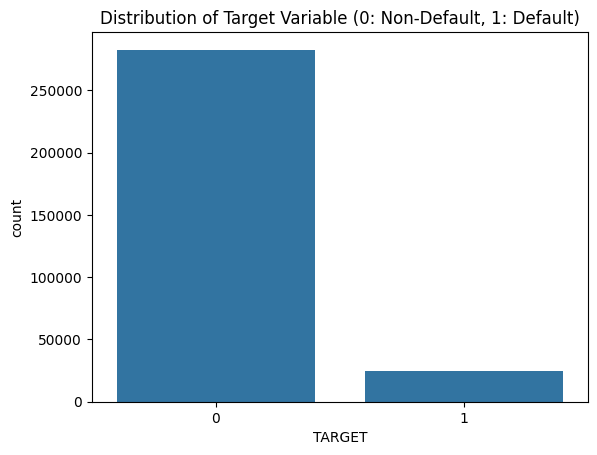

In [24]:
# Lets visualize Target variable
sns.countplot(x='TARGET',data =new_df_app)
plt.title('Distribution of Target Variable (0: Non-Default, 1: Default)')
plt.show()

## Lets conduct Univariate Analysis on Application data

In [25]:
#lets separate num cols and cat cols by data type and meaning ful columns
num_cols=["SK_ID_CURR", "TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL",
       "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
       "DAYS_REGISTRATION", "DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","EXT_SOURCE_2","EXT_SOURCE_3", 
       "DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_YEAR", "AGE_YEARS",
       "EMPLOYMENT_YEARS"]

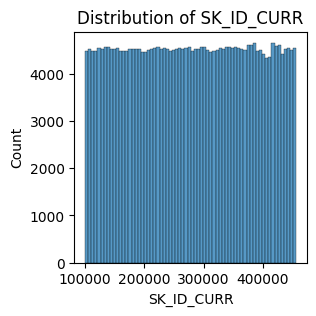

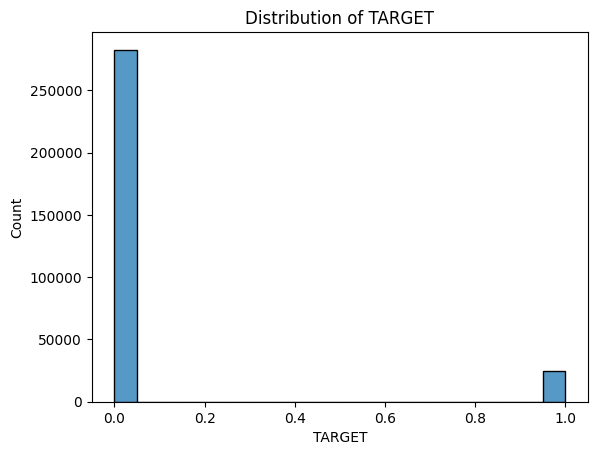

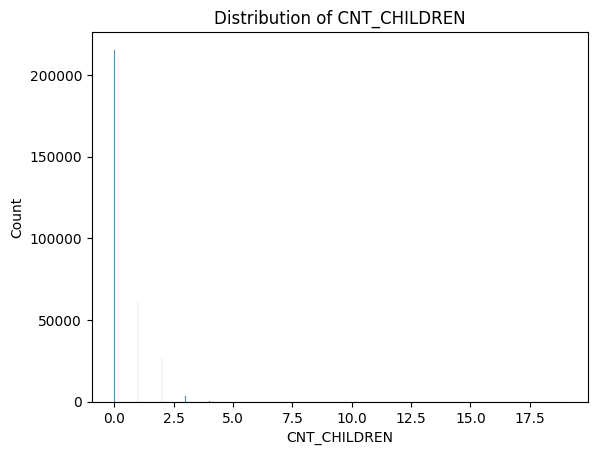

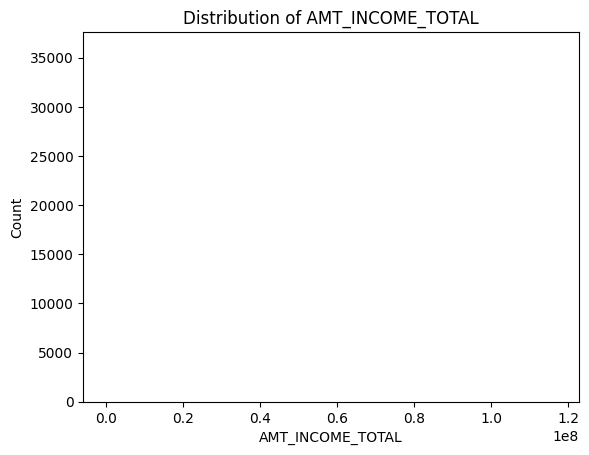

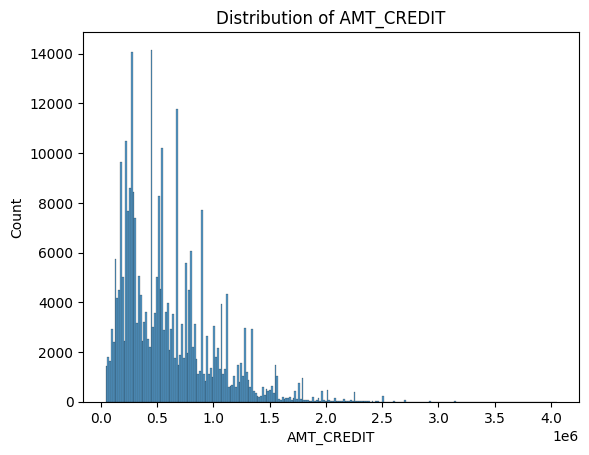

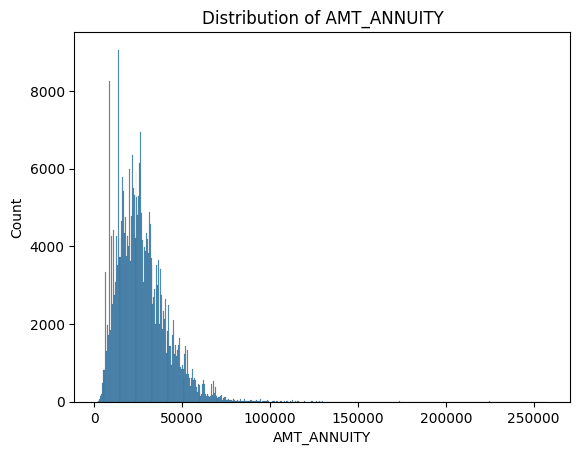

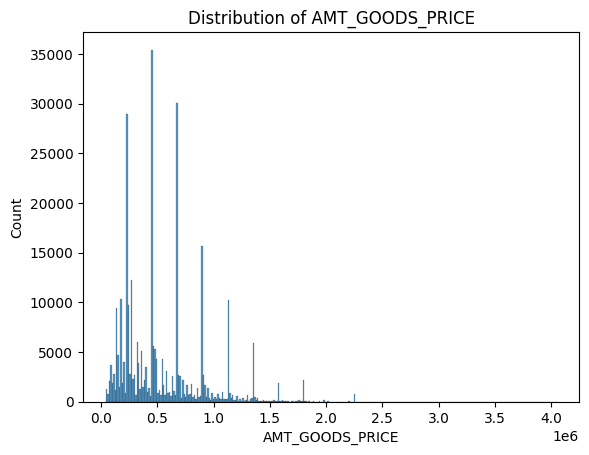

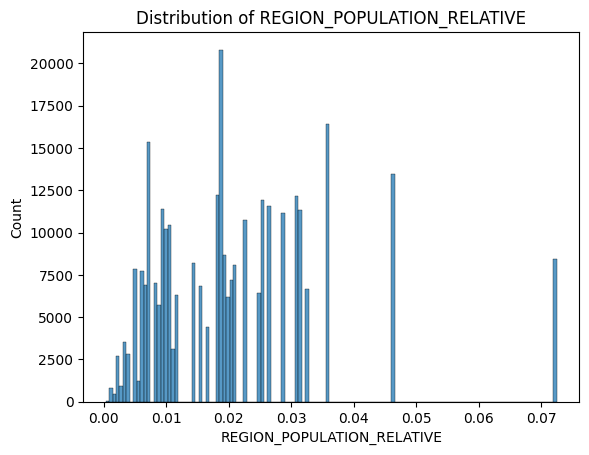

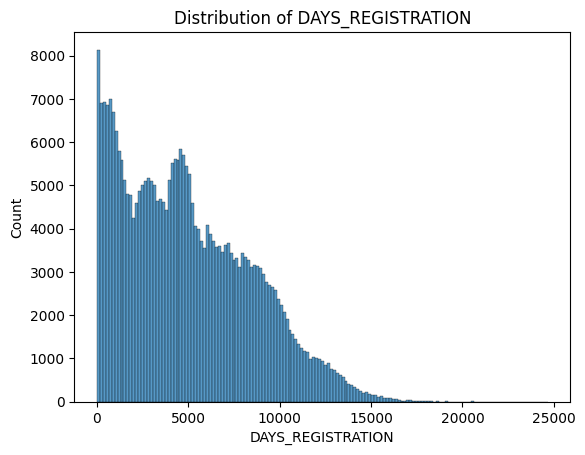

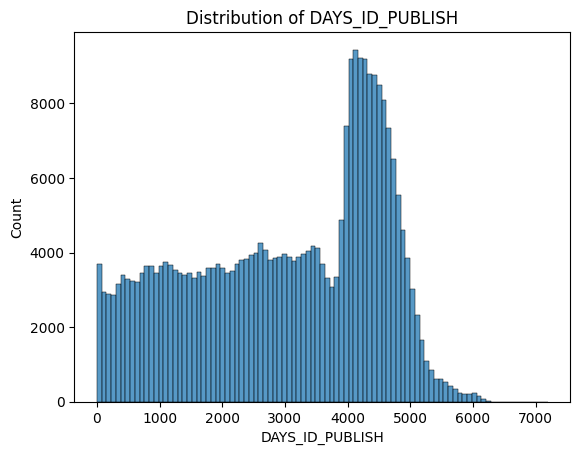

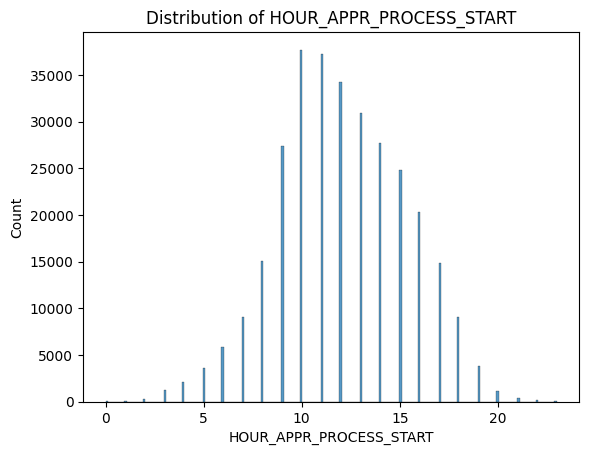

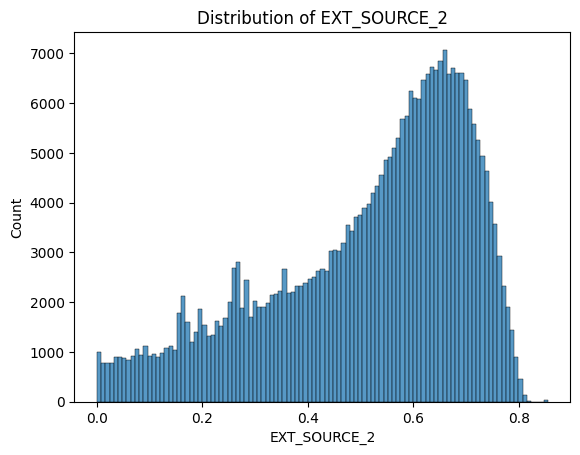

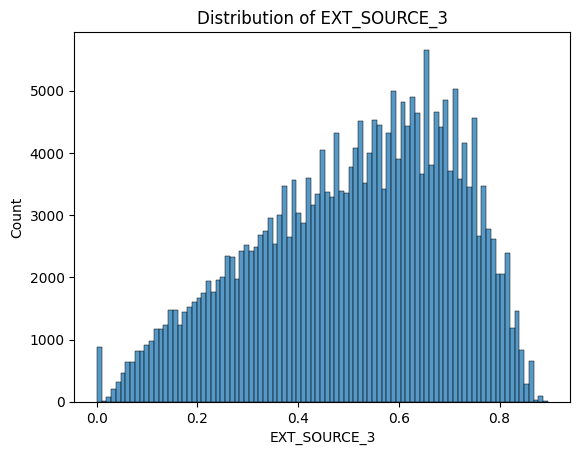

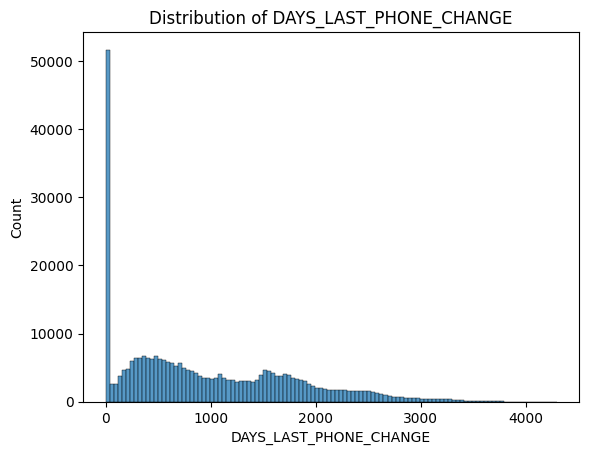

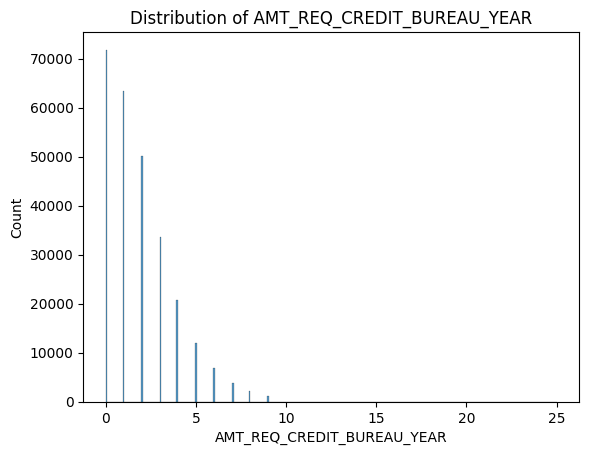

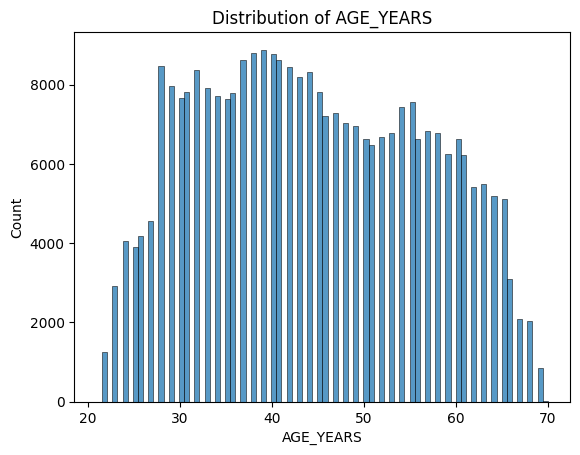

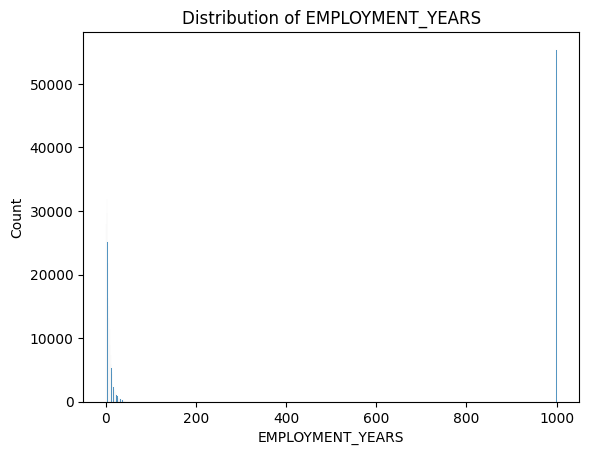

In [26]:
plt.figure(figsize=(3,3))
for col in num_cols :
    sns.histplot(x= new_df_app[col])
    
    plt.title(f'Distribution of {col}')
    plt.show()

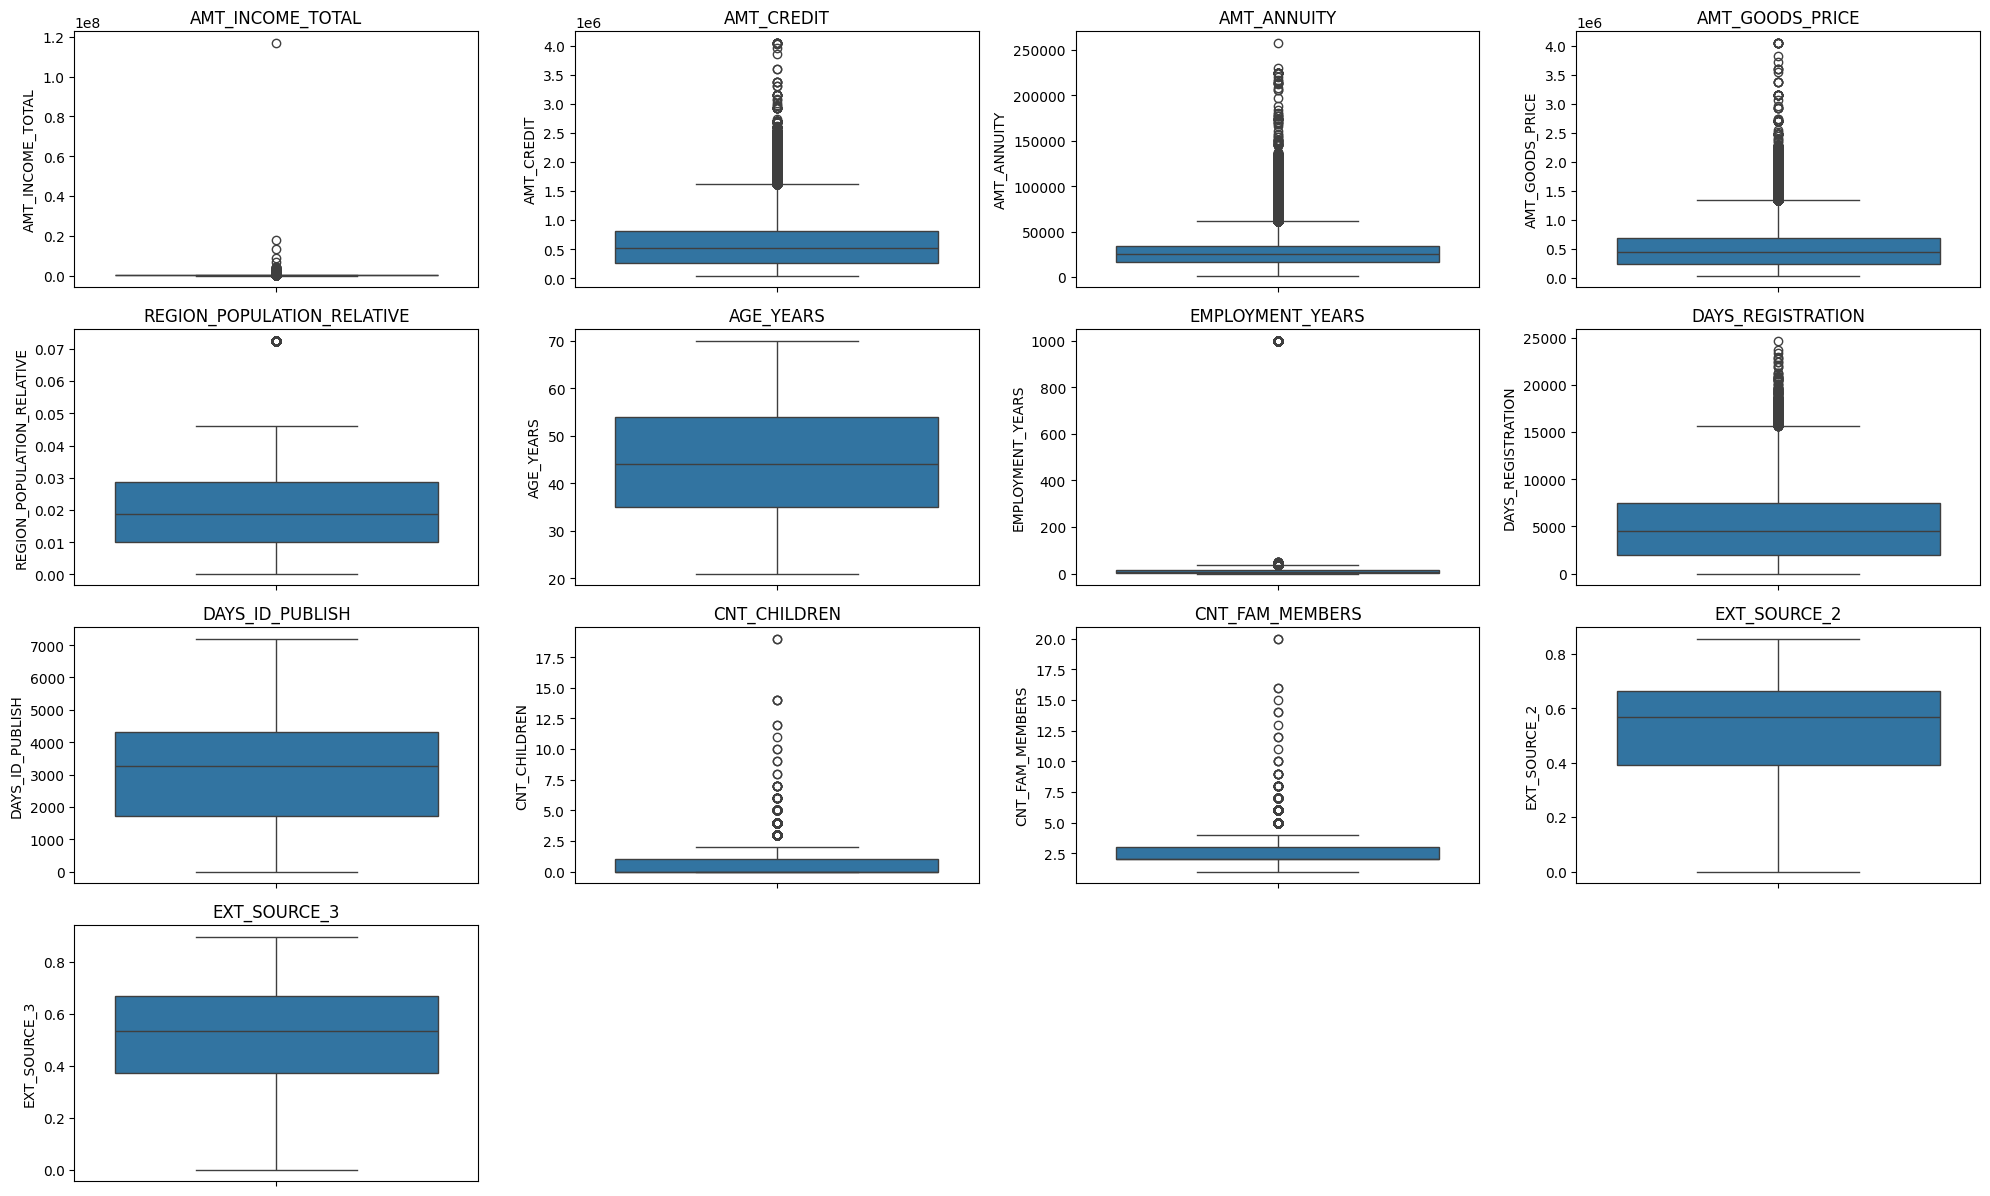

In [27]:
numerical_columns = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE', 'AGE_YEARS','EMPLOYMENT_YEARS','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
    'EXT_SOURCE_3']

# Plotting boxplots for the selected columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=new_df_app[column])
    plt.title(column)
plt.tight_layout()
plt.show()

#### Observation from Histogram and Box plots -
- CNT_CHILDREN: Highly right-skewed, Most applicants have 0-2 childre, Few outliers showing larger families
- CNT_FAM_MEMBERS: Right-skewed, Most families have 1-4 members, Several outliers indicating larger families
- AMT_CREDIT variable :
 it has Right-skewed distribution, it has Numerous outliers at higher values, Compact interquartile range relative to outliers
- AMT_ANNUITY has Right-skewed distribution having Median around 25,000, Multiple outliers at higher values and it has Relatively tight interquartile range
- AMT_GOODS_PRICE has similar pattern to AMT_CREDIT, it suggests correlation with credit amount
- REGION_POPULATION_RELATIVE is extremely right-skewed, Most values concentrated near zero,several outliers indicating some densely populated regions.
- DAYS_REGISTRATION: Fairly symmetric distribution, Multiple outliers on both sides, Moderate spread in the main distribution
- EXT_SOURCE_2: Slightly left-skewed, Few outliers
- EXT_SOURCE_3: Relatively normal distribution, Few outliers, Similar pattern to other EXT_SOURCE variables


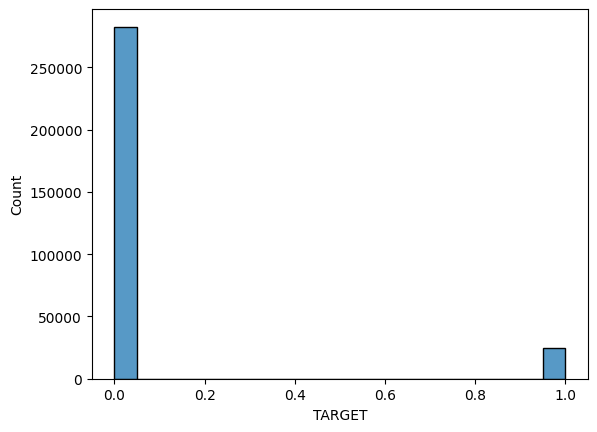

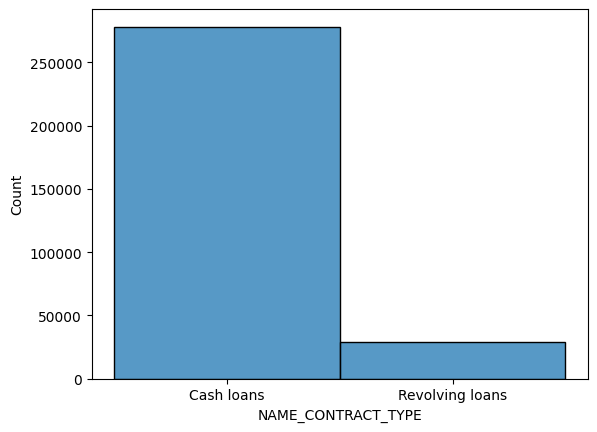

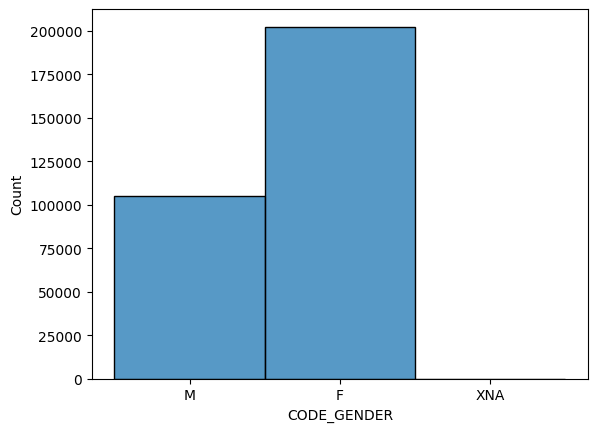

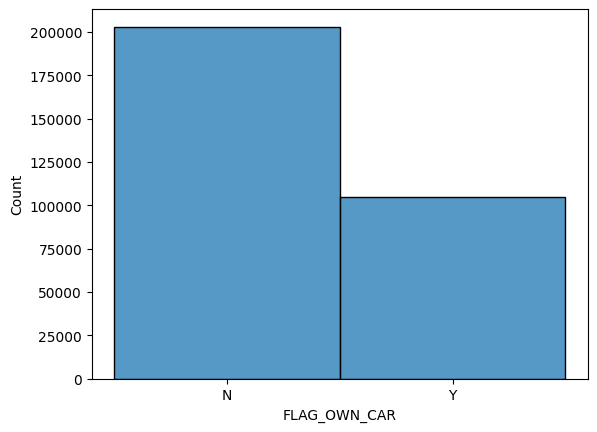

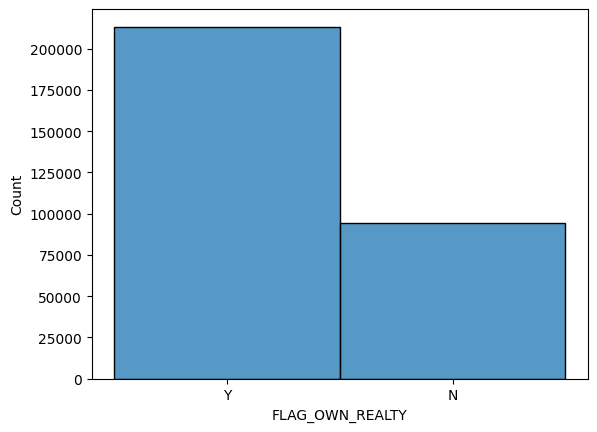

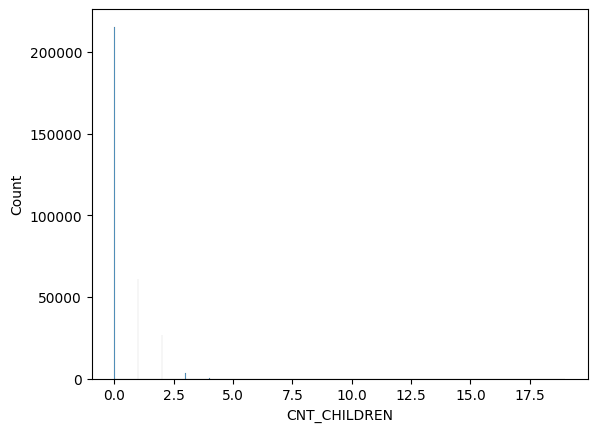

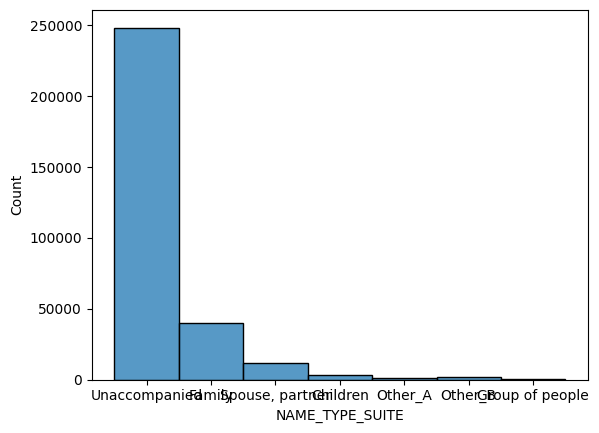

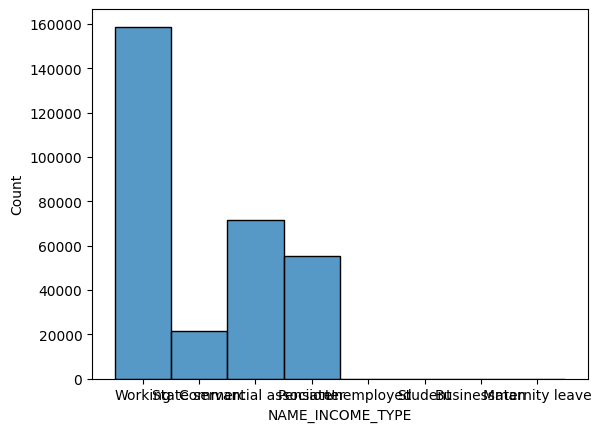

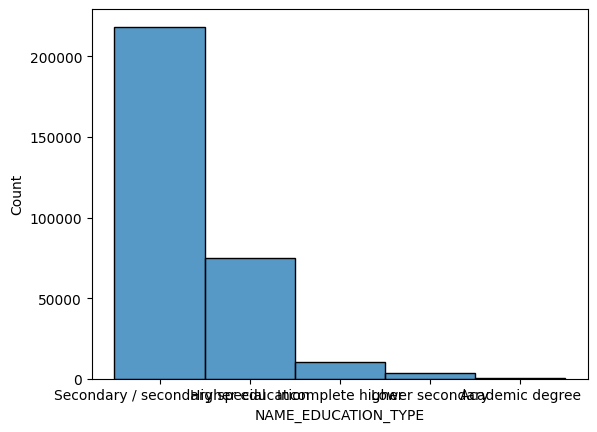

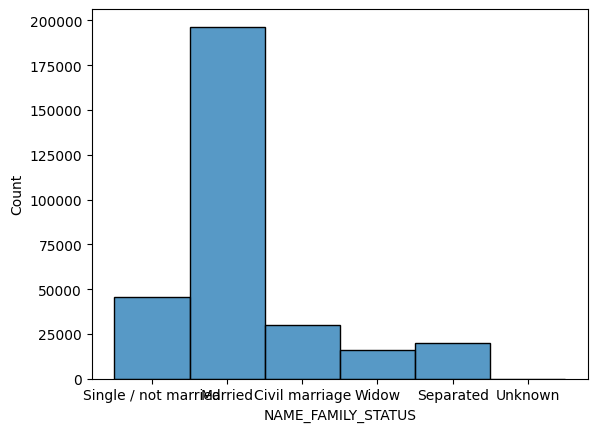

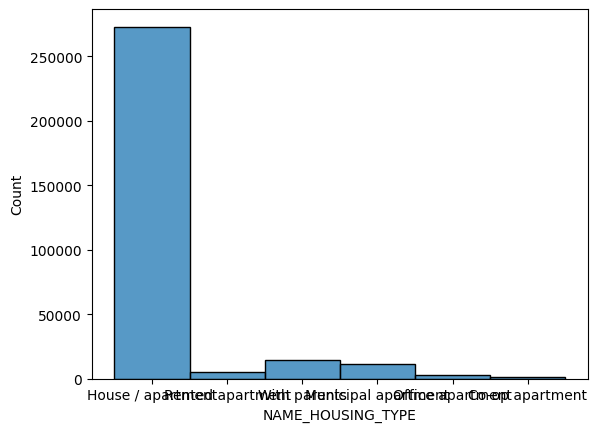

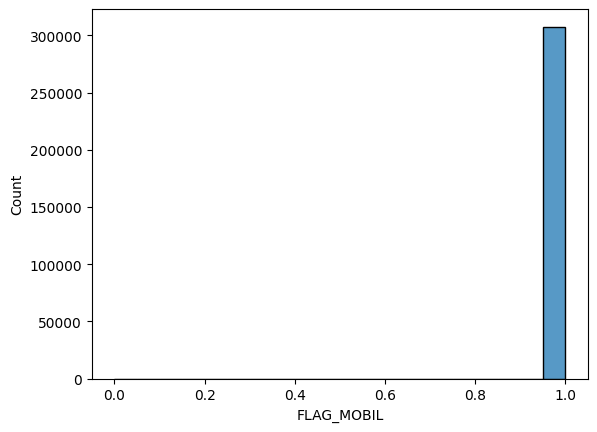

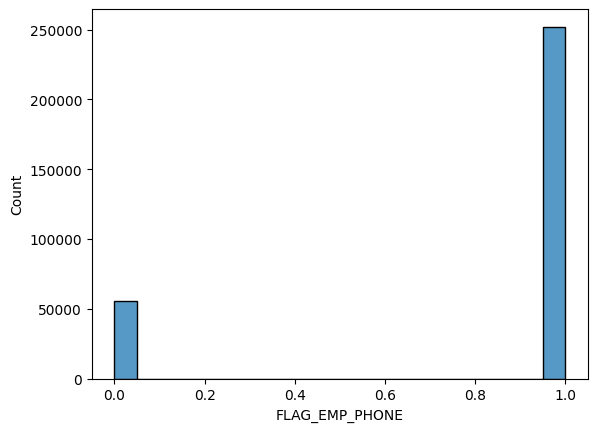

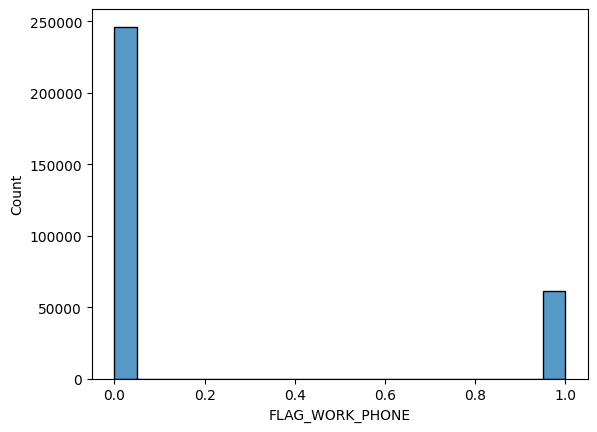

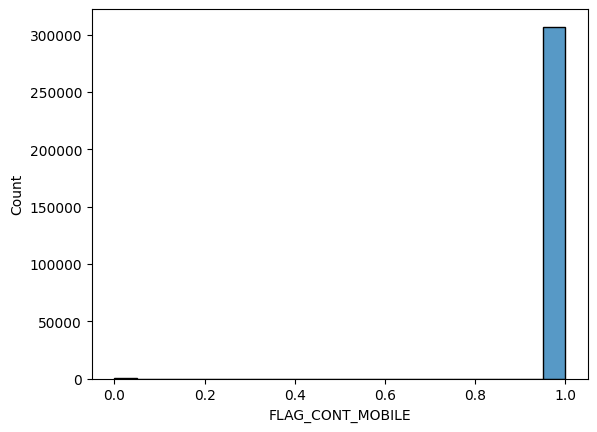

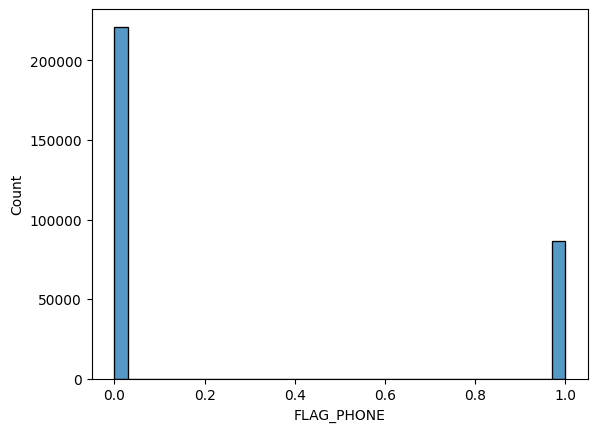

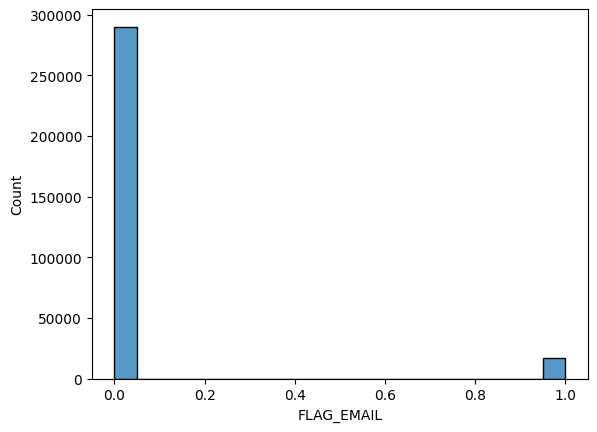

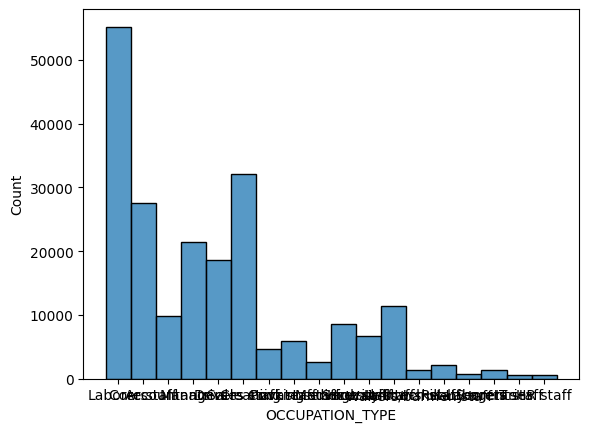

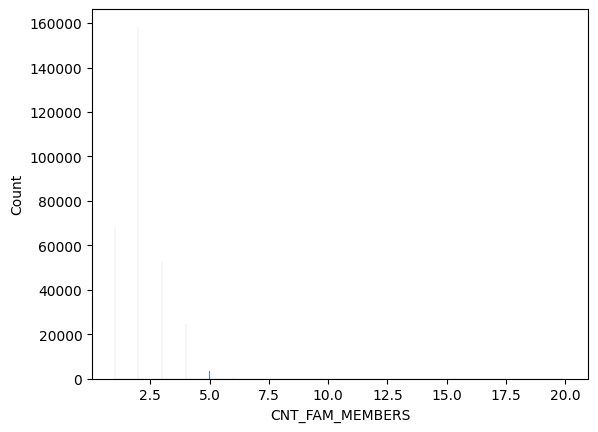

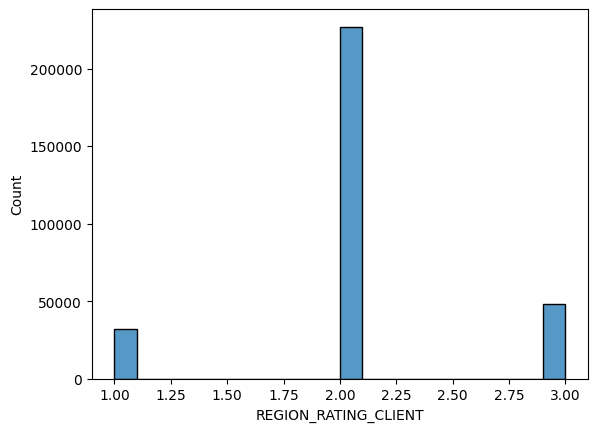

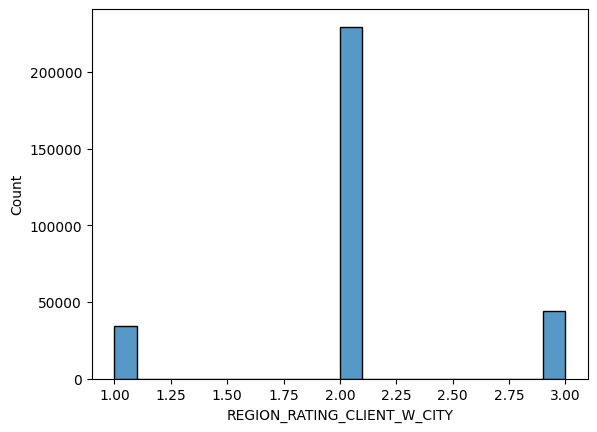

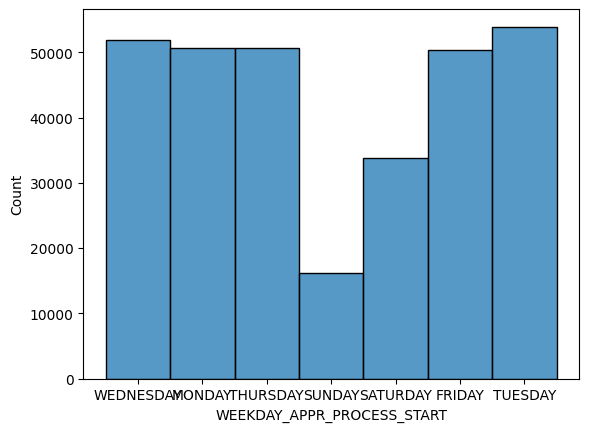

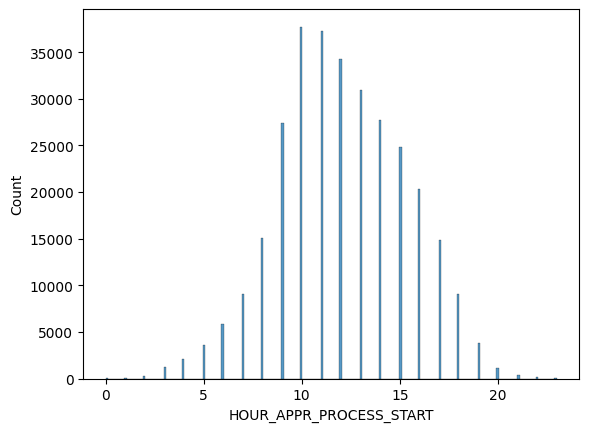

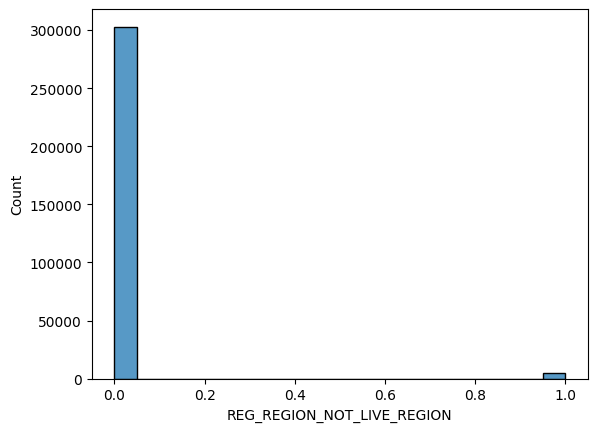

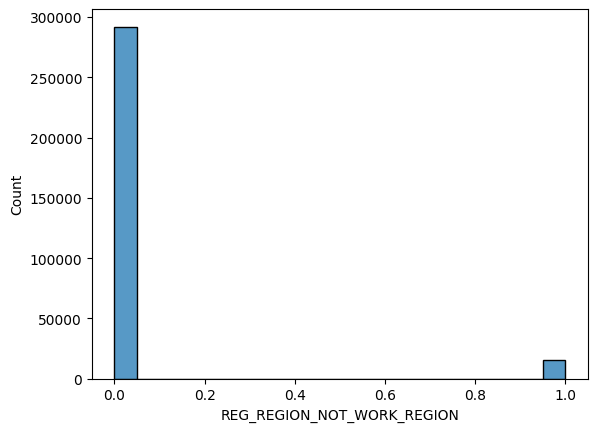

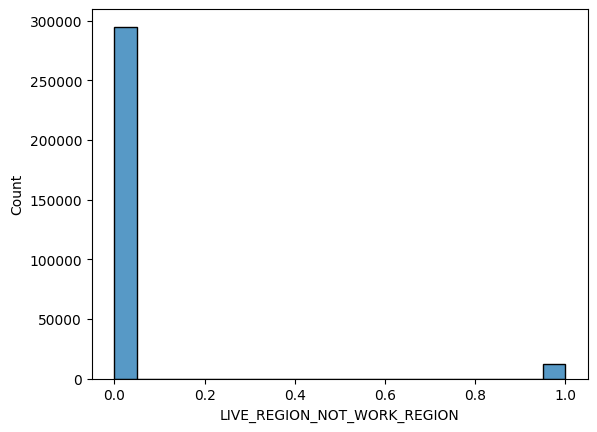

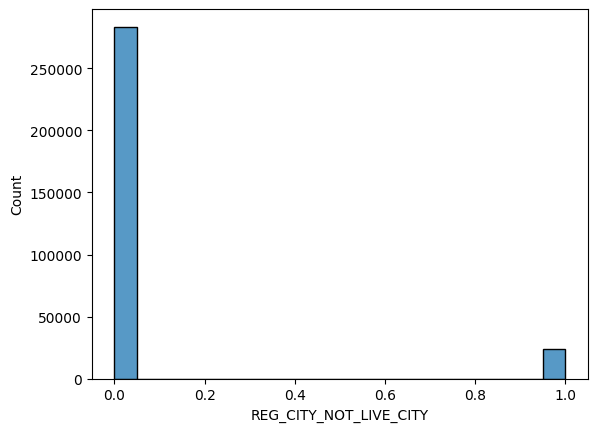

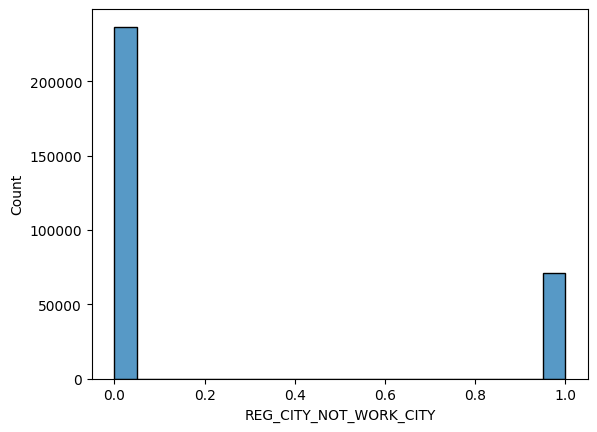

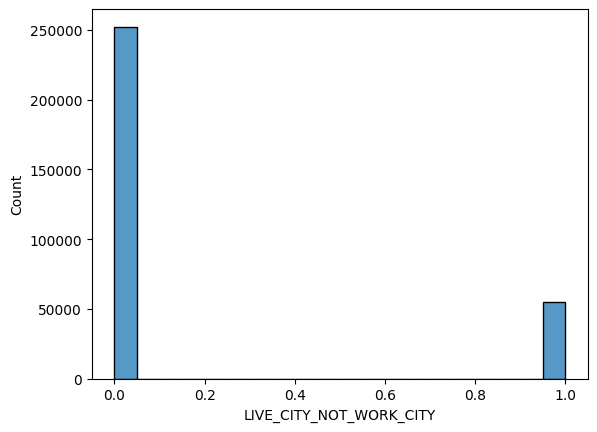

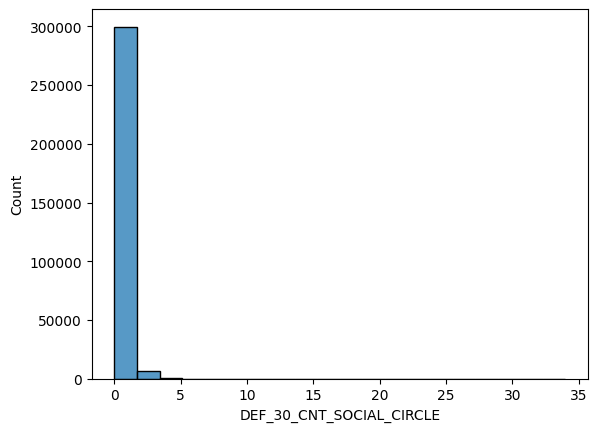

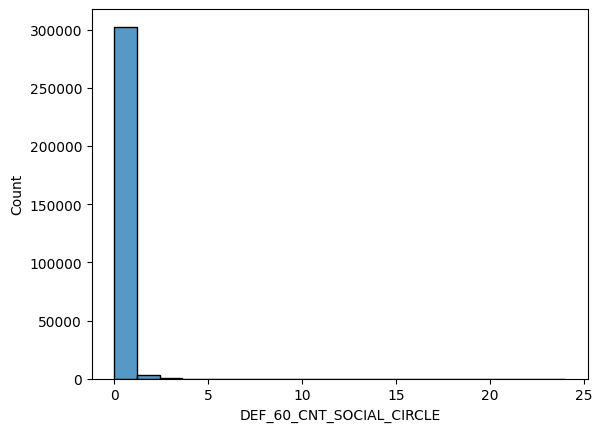

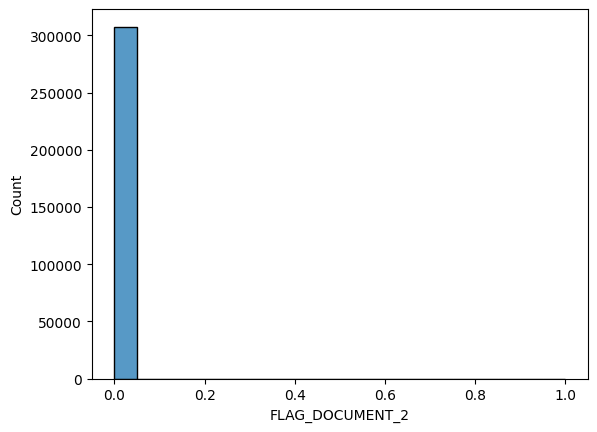

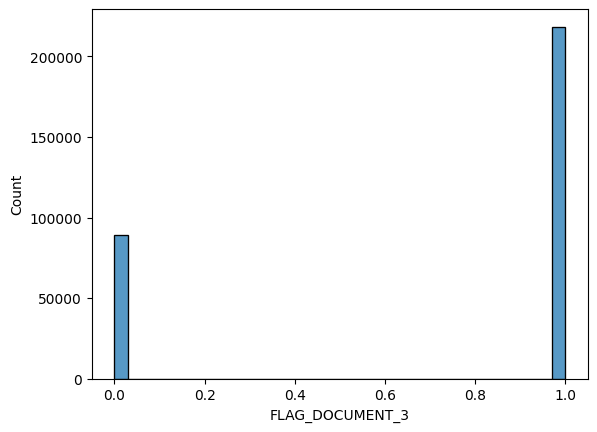

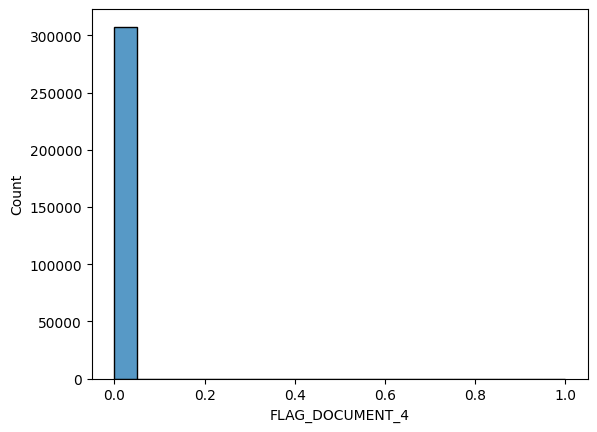

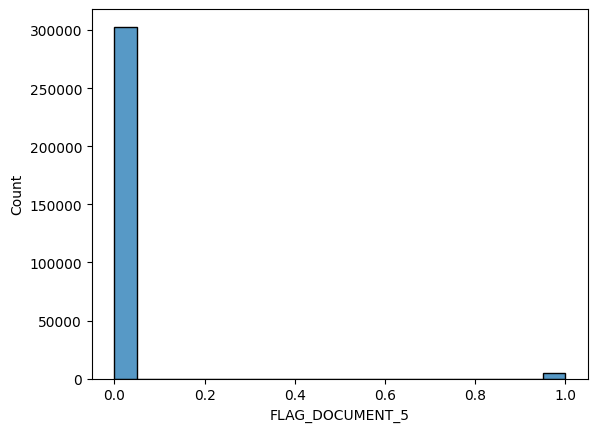

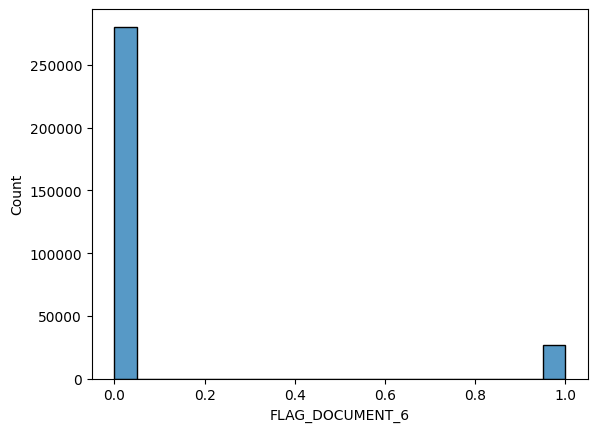

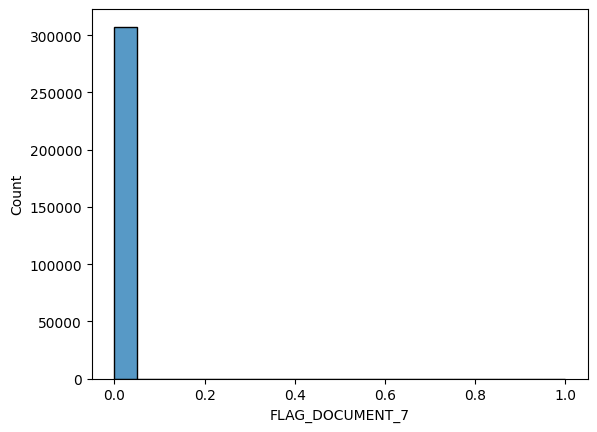

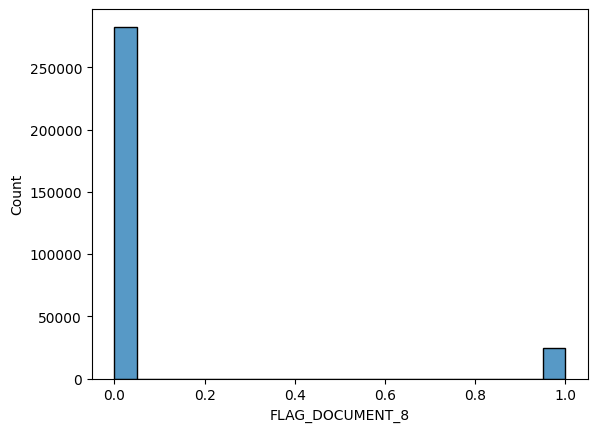

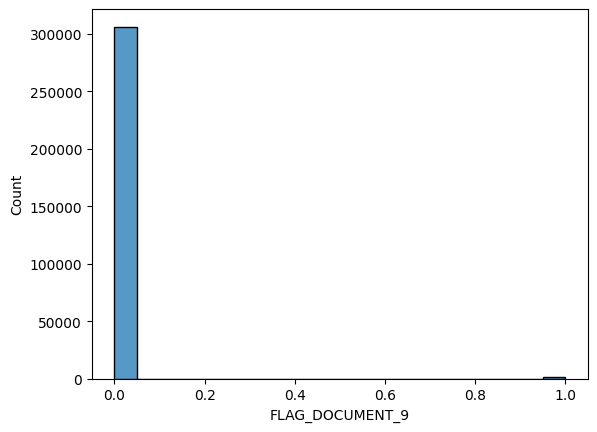

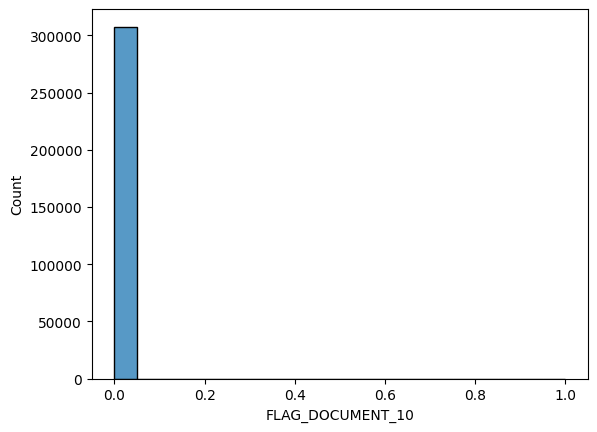

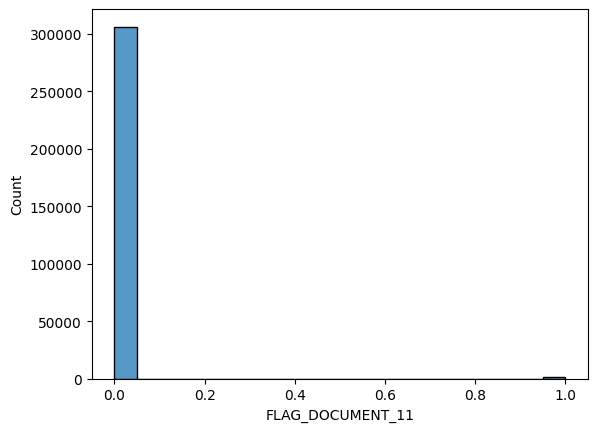

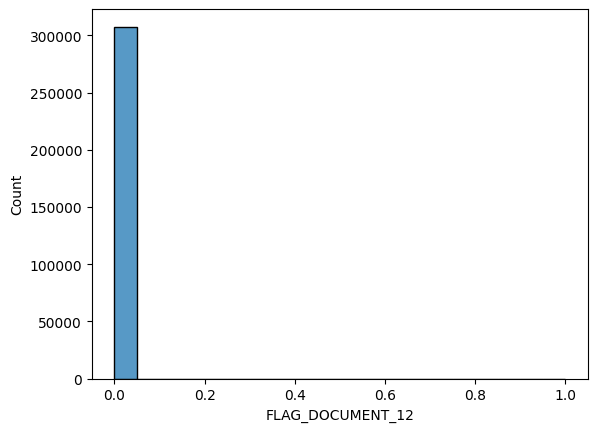

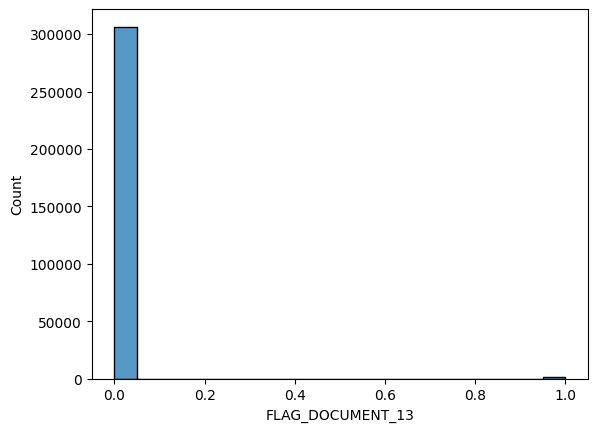

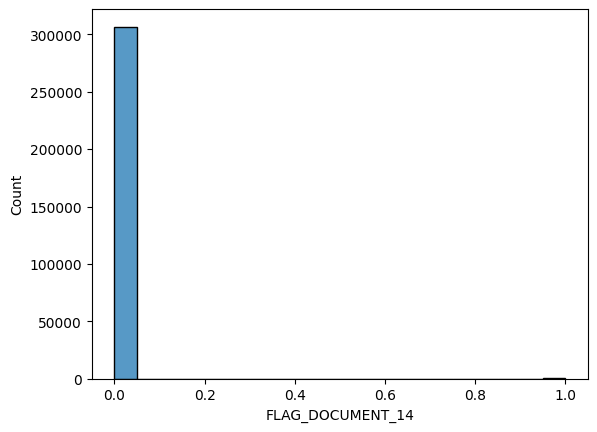

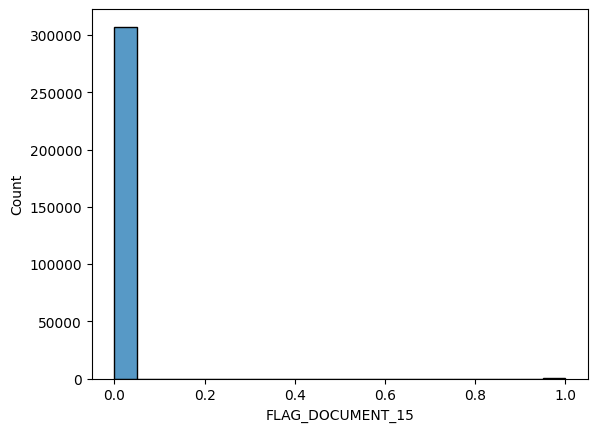

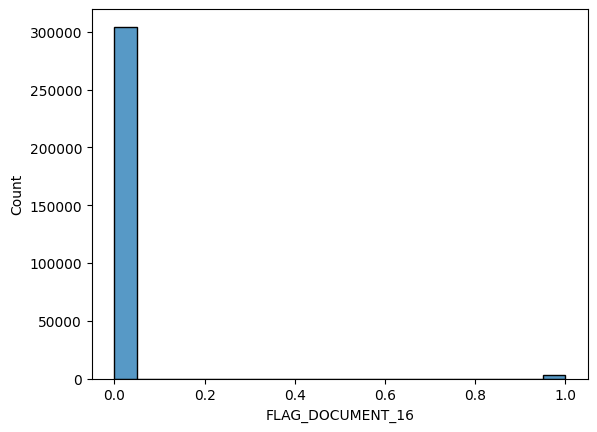

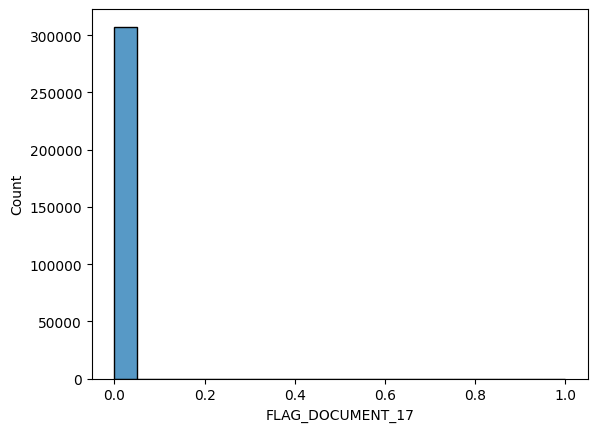

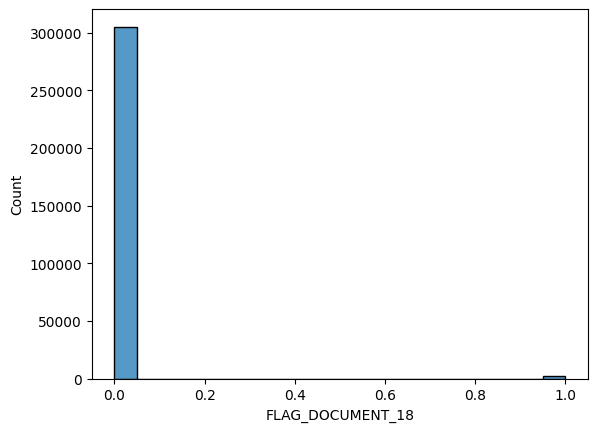

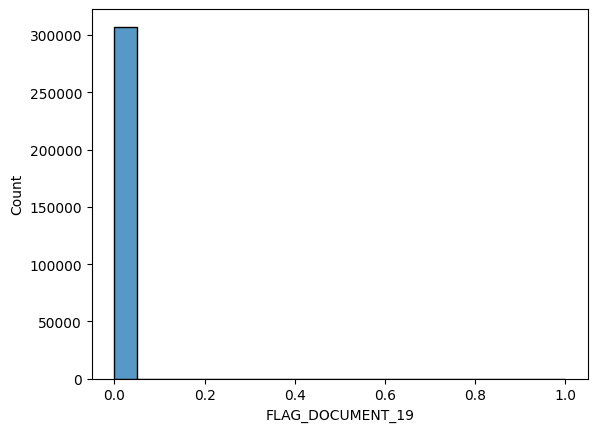

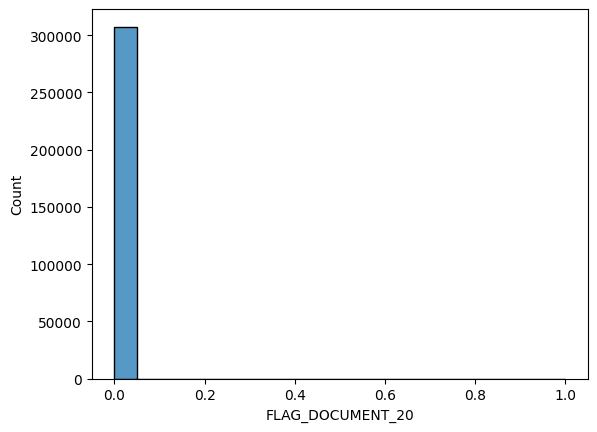

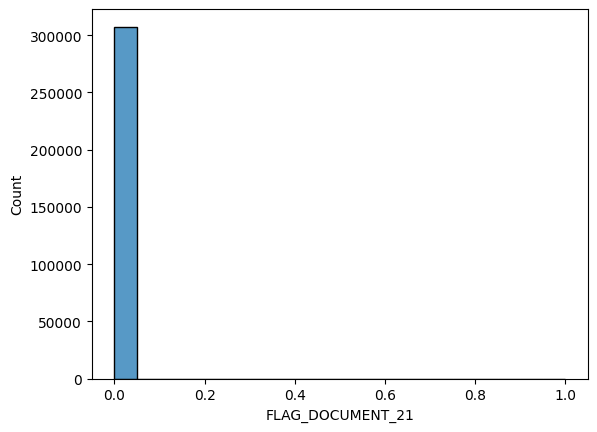

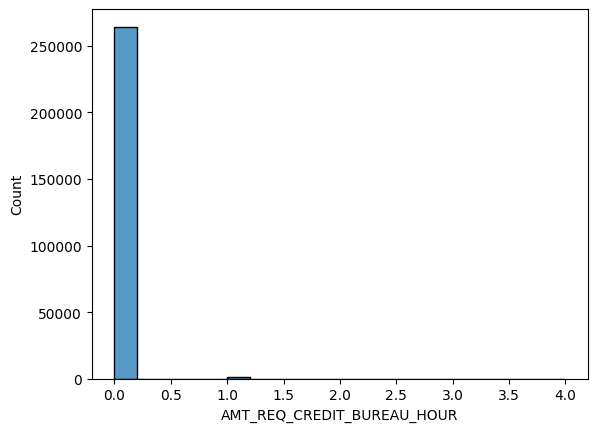

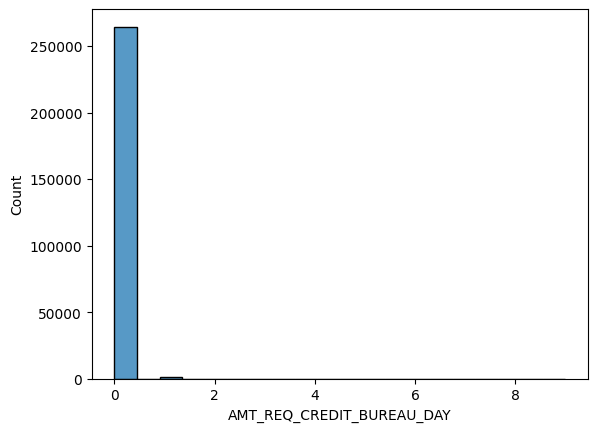

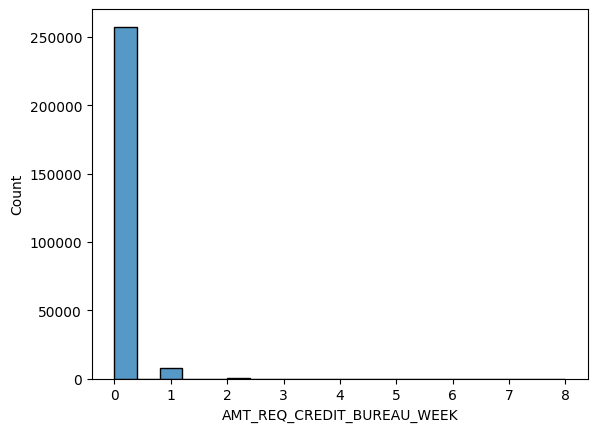

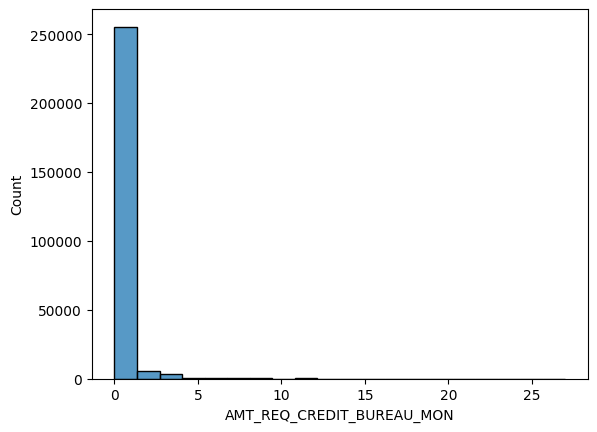

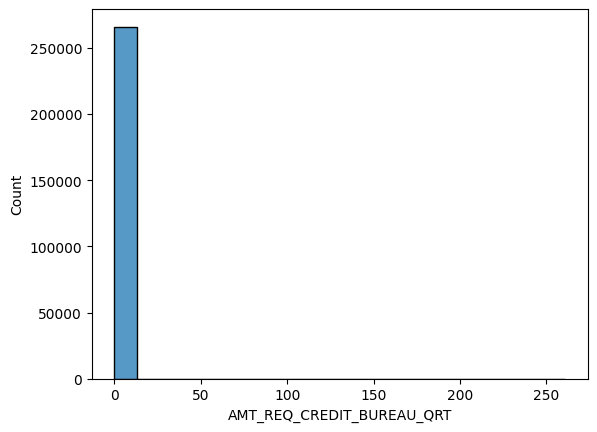

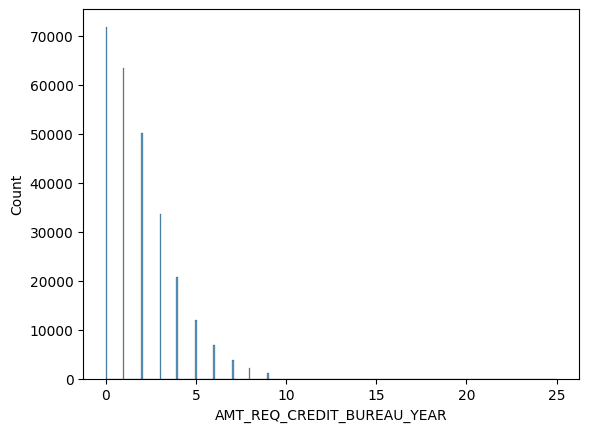

In [28]:
for col in cat_cols :
    sns.histplot(x= new_df_app[col])
    plt.show()

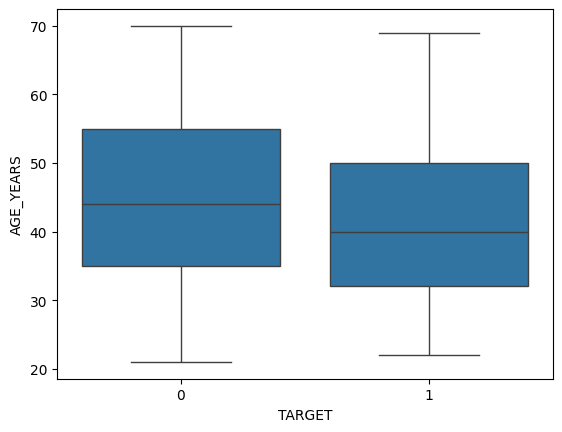

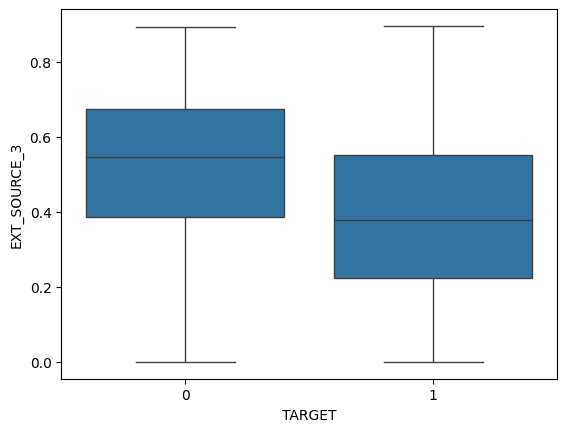

In [29]:
#Bivariate Analysis
sns.boxplot(x=new_df_app["TARGET"],y=new_df_app["AGE_YEARS"])
plt.show()

sns.boxplot(x=new_df_app["TARGET"],y=new_df_app["EXT_SOURCE_3"])
plt.show()

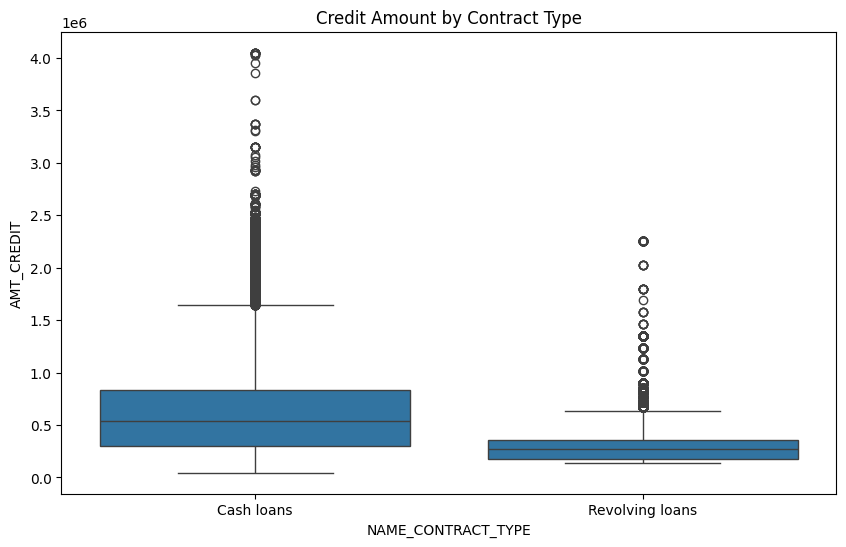

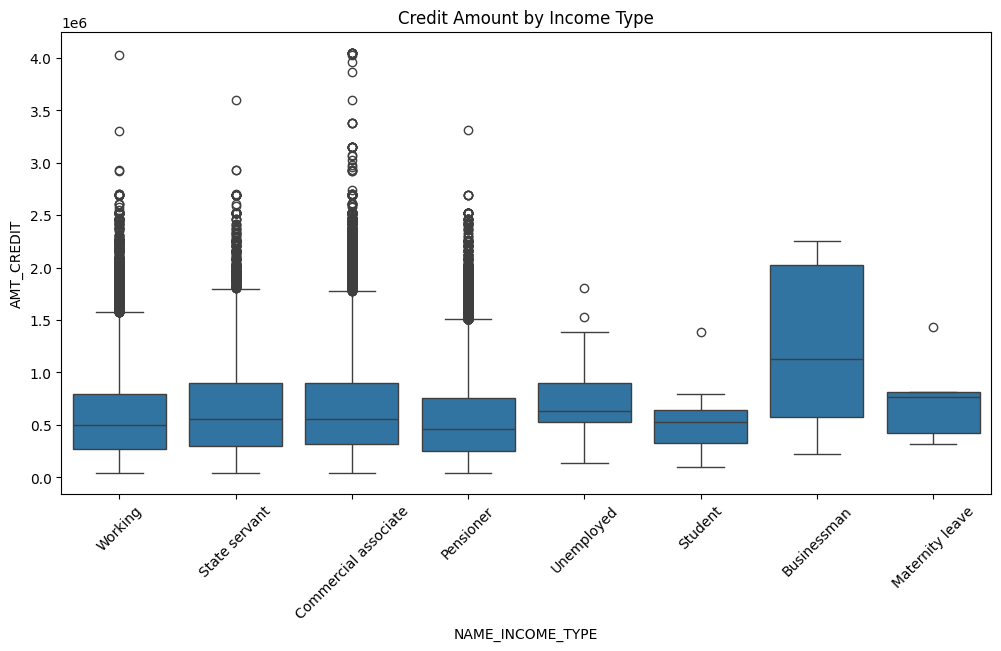

In [30]:
# Create contract type analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=new_df_app)
plt.title('Credit Amount by Contract Type')
plt.show()

# Analyze income type and credit amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=new_df_app)
plt.xticks(rotation=45)
plt.title('Credit Amount by Income Type')
plt.show()

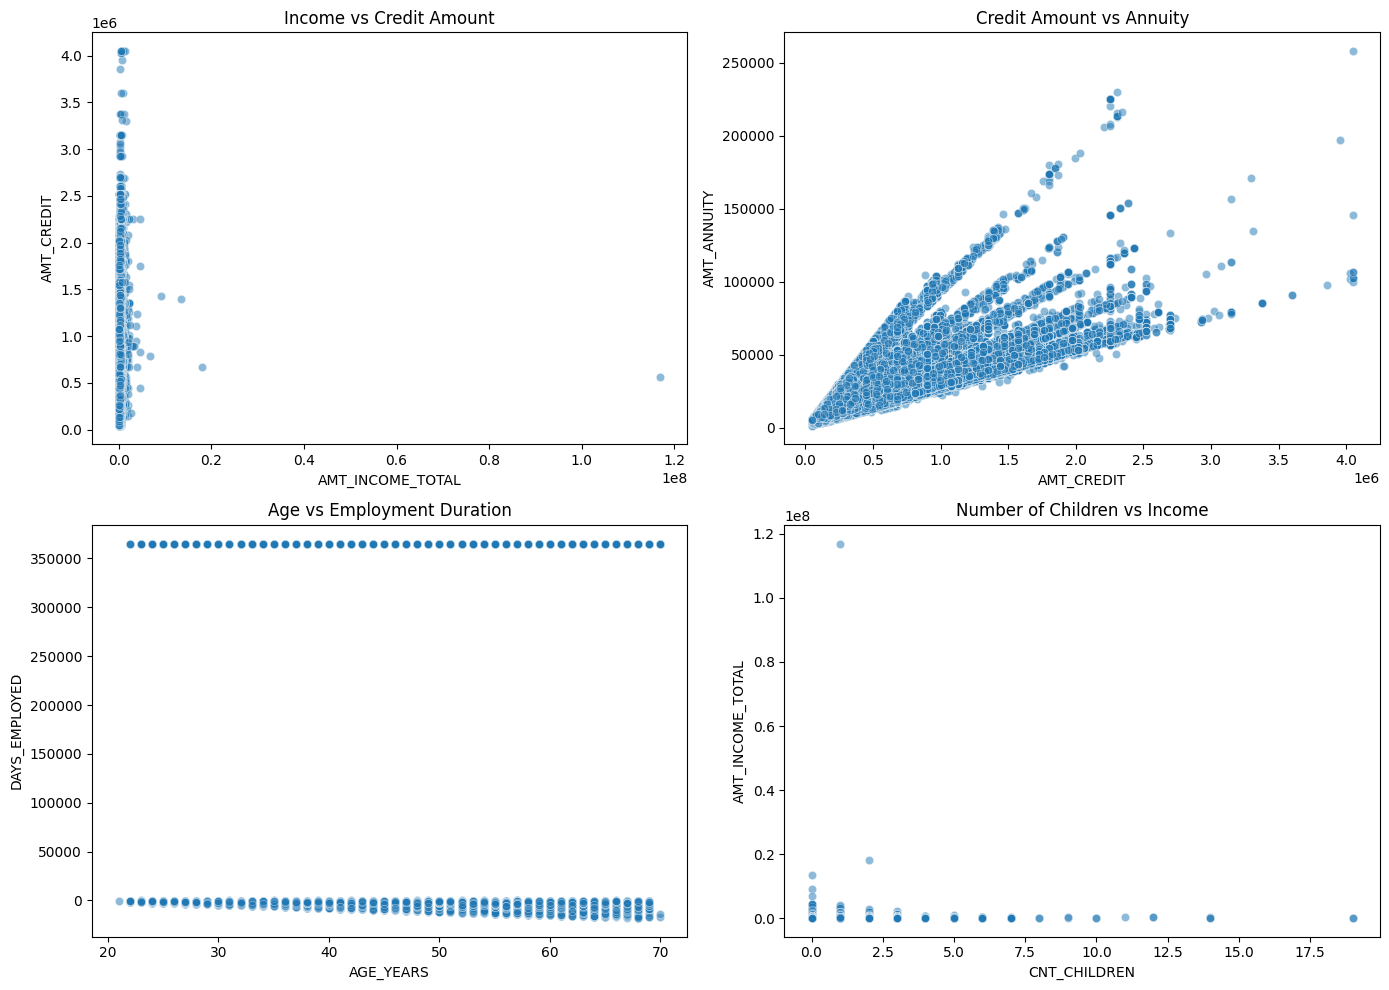

In [34]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: AMT_INCOME_TOTAL vs. AMT_CREDIT
sns.scatterplot(data=new_df_app, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', ax=axes[0, 0], alpha=0.5)
axes[0, 0].set_title('Income vs Credit Amount')

# Plot 2: AMT_CREDIT vs. AMT_ANNUITY
sns.scatterplot(data=new_df_app, x='AMT_CREDIT', y='AMT_ANNUITY', ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('Credit Amount vs Annuity')

# Plot 3: DAYS_BIRTH vs. DAYS_EMPLOYED
sns.scatterplot(data=new_df_app, x='AGE_YEARS', y='DAYS_EMPLOYED', ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Age vs Employment Duration')

# Plot 4: CNT_CHILDREN vs. AMT_INCOME_TOTAL
sns.scatterplot(data=new_df_app, x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Number of Children vs Income')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Calculate correlation between TARGET and numerical variables
numerical_cols = new_df_app.select_dtypes(include=[np.number]).columns
correlations = new_df_app[numerical_cols].corr()['TARGET'].sort_values(ascending=False)

print("Top 10 positive correlations with TARGET:")
print(correlations.head(10))
print("\
Top 10 negative correlations with TARGET:")
print(correlations.tail(10))

Top 10 positive correlations with TARGET:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
Name: TARGET, dtype: float64
Top 10 negative correlations with TARGET:
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
DAYS_REGISTRATION            -0.041975
DAYS_EMPLOYED                -0.044932
EMPLOYMENT_YEARS             -0.047046
DAYS_ID_PUBLISH              -0.051457
DAYS_LAST_PHONE_CHANGE       -0.055218
AGE_YEARS                    -0.078237
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


#### Observation -
The bivariate analysis was successfully conducted which reveals key relationships between variables such as income, credit amount, contract type. The visualizations and correlation analysis provide insights into these relationships, helping to identify important driver variables for further analysis.

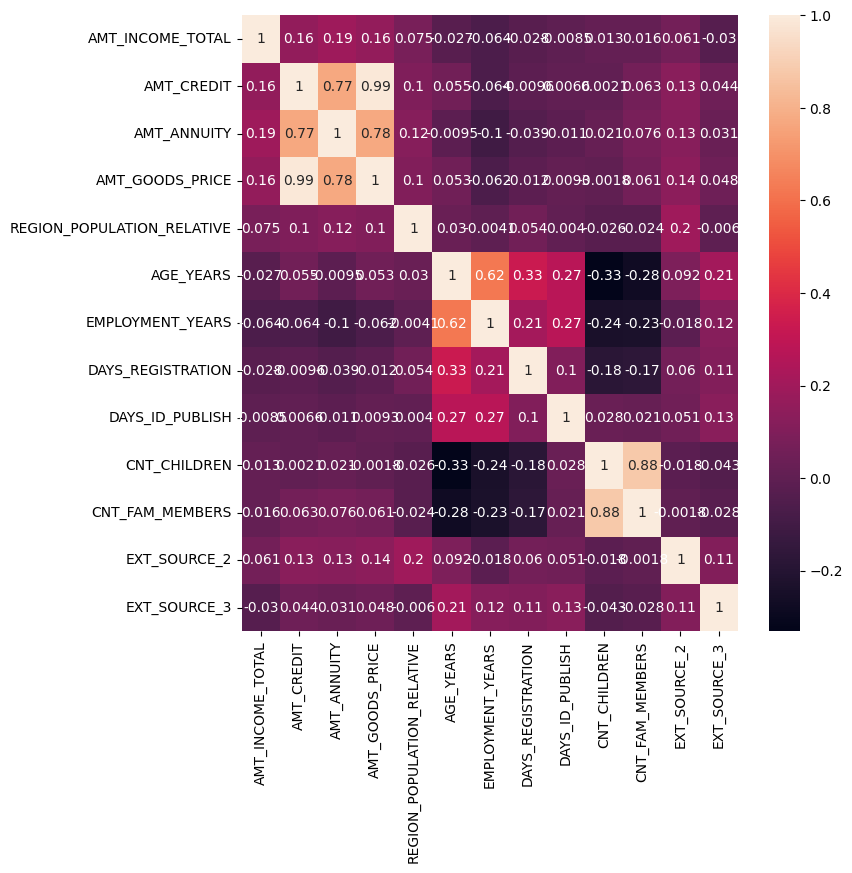

In [32]:
#### Multivariate Analysis

plt.figure(figsize=(8,8))
sns.heatmap(new_df_app[numerical_columns].corr(),annot=True)
plt.show()